# Develop k-Nearest Neighbors Classifier in Python From Scratch

<font color='green'> 
I implemented k-Nearest Neighbors Classification Algorithm in python from scratch using [iris.csv](https://www.kaggle.com/uciml/iris) dataset.
</font>

<font color='grey'> *Details of the codes can be found at [this](https://github.com/eliffkkurt/MyRoadmap/blob/main/Machine%20Learning%20Algorithms/k-Nearest%20Neighbors%20Classifier/Develop%20k-Nearest%20Neighbors%20Classifier%20in%20Python%20From%20Scratch.ipynb) link.*</font>

#### Kaynaklar: 

- [Develop k-Nearest Neighbors in Python From Scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

- [KNN-Python from Scratch](https://www.kaggle.com/nooneranjithkumar/knn-python-from-scratch)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

### Step 1: Data Loading

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
data = iris.copy()

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Data Visualization

In [5]:
Species = list(set(data['Species']))
Specie1 = data[data['Species']==Species[0]]
Specie2 = data[data['Species']==Species[1]]
Specie3 = data[data['Species']==Species[2]]

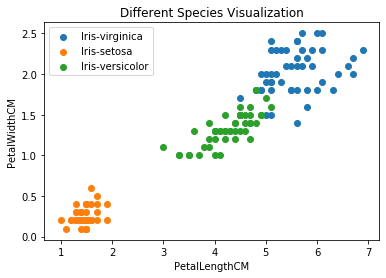

In [6]:
plt.scatter(Specie1['PetalLengthCm'], Specie1['PetalWidthCm'], label=Species[0])
plt.scatter(Specie2['PetalLengthCm'], Specie2['PetalWidthCm'], label=Species[1])
plt.scatter(Specie3['PetalLengthCm'], Specie3['PetalWidthCm'], label=Species[2])
plt.xlabel('PetalLengthCM')
plt.ylabel('PetalWidthCM')
plt.legend() #adlarını sol üste ekliyor
plt.title('Different Species Visualization');

### Step 3: Data Preprocessing

In [7]:
req_data = data.iloc[:,1:]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
shuffle_index = np.random.permutation(req_data.shape[0]) # rowa göre shufflelıyoruz.
req_data = req_data.iloc[shuffle_index]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
127,6.1,3.0,4.9,1.8,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
52,6.9,3.1,4.9,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [9]:
train_size = int(req_data.shape[0]*0.7)

In [10]:
train_df = req_data.iloc[:train_size,:]
test_df = req_data.iloc[train_size:,:]

In [11]:
x_test = test_df.drop('Species', axis=1)

In [12]:
train = train_df.values
test = x_test.values

In [13]:
y_true = test_df.iloc[:,-1]

In [14]:
y_true

29         Iris-setosa
141     Iris-virginica
143     Iris-virginica
44         Iris-setosa
84     Iris-versicolor
95     Iris-versicolor
72     Iris-versicolor
102     Iris-virginica
31         Iris-setosa
138     Iris-virginica
113     Iris-virginica
87     Iris-versicolor
131     Iris-virginica
103     Iris-virginica
34         Iris-setosa
70     Iris-versicolor
83     Iris-versicolor
7          Iris-setosa
144     Iris-virginica
10         Iris-setosa
88     Iris-versicolor
64     Iris-versicolor
146     Iris-virginica
45         Iris-setosa
119     Iris-virginica
11         Iris-setosa
16         Iris-setosa
100     Iris-virginica
35         Iris-setosa
21         Iris-setosa
116     Iris-virginica
74     Iris-versicolor
147     Iris-virginica
18         Iris-setosa
20         Iris-setosa
58     Iris-versicolor
78     Iris-versicolor
4          Iris-setosa
30         Iris-setosa
89     Iris-versicolor
142     Iris-virginica
94     Iris-versicolor
19         Iris-setosa
136     Iri

In [15]:
y_true = y_true.values

In [16]:
y_true

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

### Step 4: Creating Model with KNN Algorithm

#### <font color='blue'>1. İki Row Arasındaki Öklid Uzaklığı Hesaplamak</font>

In [17]:
def euclidean_distance(x_test_row, x_train_row): 
    distance = 0
    for i in range(len(x_train_row)-1): # Species sütununu hesaba katmıyoruz.
        distance = distance + ((x_test_row[i]-x_train_row[i])**2)
        
    return sqrt(distance)

In [18]:
euclidean_distance(test[0], train[0])

3.9306488014067096

#### <font color='blue'> 2. En Yakın Komşuları Almak </font>
Test setinde bulunan **tek bir rowun** train setindeki her bir rowla olan uzaklığını hesaplayıp en yakın K tanesini alacağız.

In [19]:
def get_neighbors(x_test_row, x_train, num_neighbors):
    distances = []
    for x_train_row in x_train:
        distances.append((euclidean_distance(x_test_row, x_train_row), x_train_row)) # ekstra parantez ekledim tuple yapmak için.

    distances.sort(key=lambda x: x[0])
    
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][1])
    
    return neighbors 

In [20]:
get_neighbors(test[0], train, 3)

[array([4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], dtype=object),
 array([4.6, 3.2, 1.4, 0.2, 'Iris-setosa'], dtype=object),
 array([4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], dtype=object)]

#### <font color='blue'>3. Komşular içerisinde en fazla görülen türü tespit etmek</font>
Tespit ettiğimiz komşulardan hangisi daha fazla görülmüşse bizim x_test_rowumuz da o türe ait olacak.

In [21]:
def prediction(x_test_row, x_train, num_neighbors):
    neighbors_species = []
    neighbors = get_neighbors(x_test_row, x_train, num_neighbors)
    for neighbor in neighbors:
        neighbors_species.append(neighbor[-1])
        
    predicted = max(set(neighbors_species), key=neighbors_species.count)
   
    return predicted

In [22]:
prediction(test[0],train, 25)

'Iris-setosa'

### Step 5: Evaluating Model

Gerçek değerleri y_true ile ayırmıştık. Bunları modelimizin tahmin ettiği y değerleriyle karşılaştırıp accuracy'yi hesaplıyoruz.

In [23]:
y_true

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [24]:
def accuracy(x_train, num_neighbors, x_test, y_true):
    y_pred = []
    for x_test_row in x_test:
        y_pred.append(prediction(x_test_row, x_train, num_neighbors))
        
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
            
    accuracy = num_correct/len(y_true)
    print(y_pred)
    
    return accuracy

In [26]:
accuracy(train,25,test, y_true)

['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor']


0.9333333333333333